## Import the Library



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

## Import the Dataset

In [4]:
df = pd.read_csv("Housing predicton.csv")

In [5]:
# Display the five row of the dataset

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
# checking the shape of the data
df.shape

(545, 13)

## Exploratory Data Analysis

In [8]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))


Categorical variables: 7


## Exploratory Data Analysis

In [10]:
# checking for null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [11]:
# there is no missing values

In [12]:
# checking for columns
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [13]:
# checking for datatypes
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [14]:
# checking for duplicates
duplicates = df.duplicated().sum()

In [15]:
duplicates

0

In [16]:
# there is no duplicates

In [17]:
# summary statistics
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Explore the correlation between variables

<Axes: >

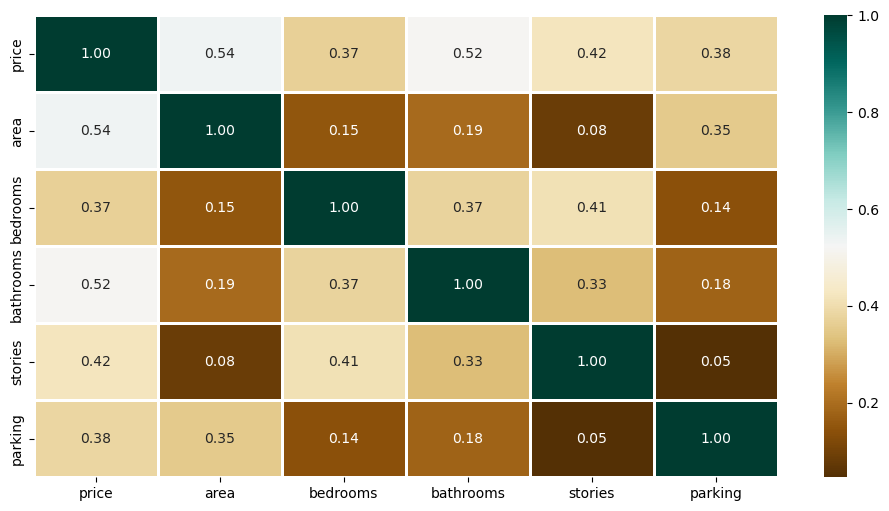

In [19]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

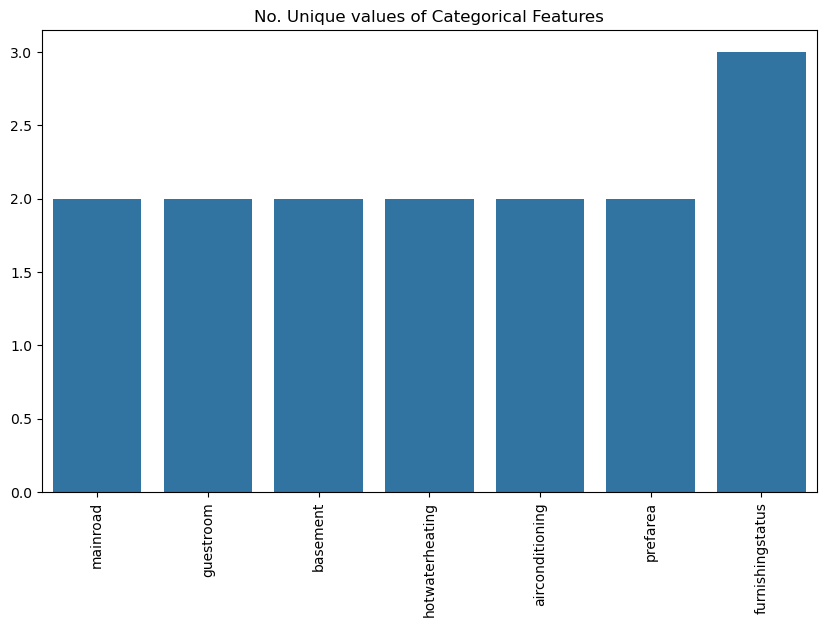

In [20]:
unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

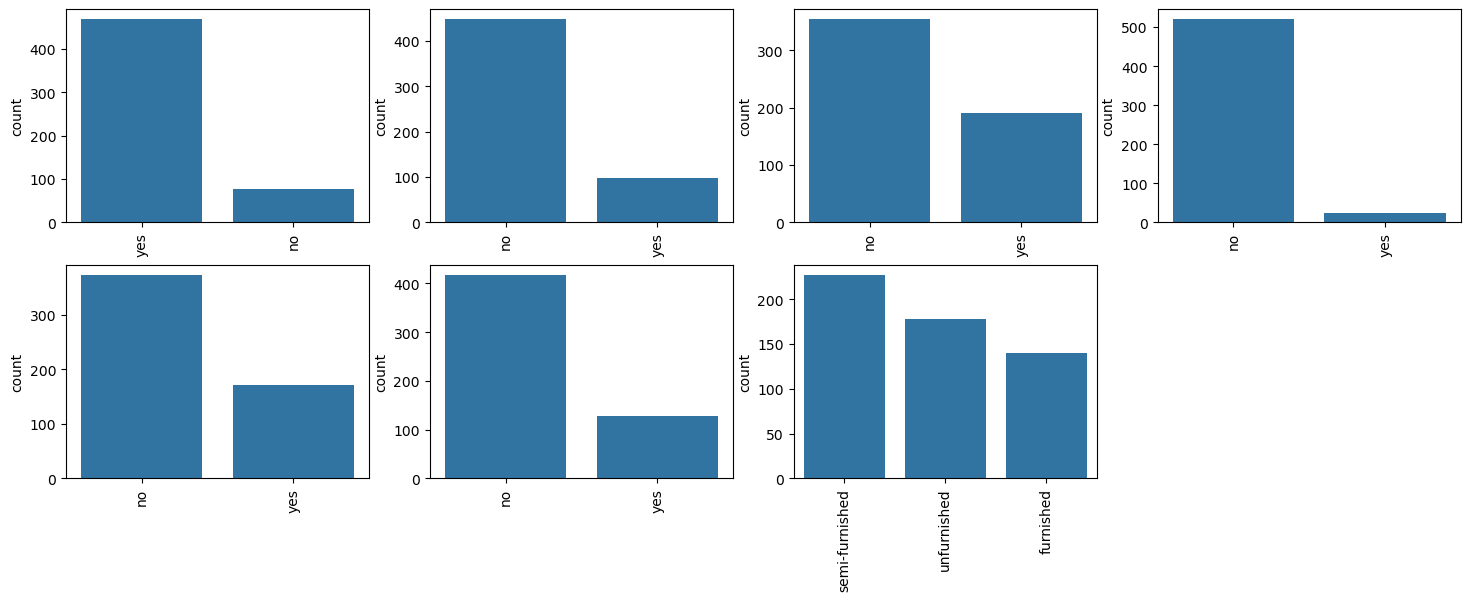

In [21]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

## OneHotEncoder - For Label categorical variable

In [23]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how 
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])

In [24]:
# To find the number of columns with 
# datatype==object
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


## Splitting  The Dataset

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# x as independent column
x = df.drop(['price'], axis=1)

# Dependent columns as Y

y = df['price']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8, test_size=0.2, random_state=42)

In [27]:

x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


In [28]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [29]:
# checking the shape of our data

print( x_train.shape,y_train.shape,y_test.shape)

(436, 12) (436,) (109,)


In [30]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

## Train a Linear Regression model

In [32]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## predict on the dataset

In [34]:
y_pred = model.predict(x_test)

In [35]:
y_pred

array([5203691.70963178, 7257004.02115476, 3062828.59668171,
       4559591.65374424, 3332932.30559782, 3563080.67918997,
       5645466.31219972, 6413979.66873635, 2755831.54819   ,
       2668938.66075228, 9570600.29915353, 2827431.50860062,
       3195686.2583409 , 3352263.99438471, 3713879.49996131,
       5301088.24435749, 2987920.2666968 , 4810799.8212371 ,
       4383031.70489929, 3525092.18938646, 5796259.50068013,
       5840000.70299301, 2760214.608641  , 4762590.14920607,
       5204755.73895206, 7515542.71619025, 3254681.68956382,
       5236164.45964444, 8178523.16820284, 3434166.15675649,
       6443921.58767582, 3346004.77919184, 6742324.74004133,
       4154936.84088665, 3589152.47491252, 5788125.92515323,
       4768370.18154076, 4391684.04193172, 3217657.04549935,
       4638196.61928878, 4522160.27786714, 3541284.06127245,
       7238136.11941171, 4021515.68926614, 3701978.76822757,
       4298879.55563098, 6705004.0206061 , 3993466.52296896,
       3798185.05328059,

## Evaluation

In [37]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print model evaluation results
print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}") 
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}") 
print(f"R-squared (R2): {r2:.2f}")  

Model Evaluation:
Mean Squared Error (MSE): 1771751116594.03
Root Mean Squared Error (RMSE): 1331071.42
R-squared (R2): 0.65


In [38]:
import pickle

In [39]:
##Creating a variable name to saved the trained mmodel
filename = 'House_model,sav'

In [40]:
# save model and feature list
pickle.dump(model, open('House_model.sav','wb'))


In [41]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample data
hours_studied = np.array([2, 4, 6, 8, 10])
scores = np.array([60, 80, 90, 100, 95])

# Reshape the data
hours_studied = hours_studied.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(hours_studied, scores)

# Make predictions
predicted_scores = model.predict(hours_studied)

the model model.fit(hours_studied, scores) # Make predictions predicted_scores = model.predict(hours_studied)






SyntaxError: invalid syntax (2243387787.py, line 20)

In [ ]:
## BUILDING A PREDICTIVE SYSTEM
input_data=(7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4)

## Changing my input data to numpy array since the processing
input_data_as_numpy = np.asarray(input_data)


## reshapingthe array as we predicting for one point
## parameter for reshaping.reshape(1,1 )
input_data_reshape = input_data_as_numpy.reshape(1, -1)

##prediction

prediction = model.predict(input_data_reshape)
print(prediction)
##writting a conditional statement for my prediction 
if prediction[0] ==1:
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), x, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = (-scores) ** 0.5
print("Cross-validated RMSE scores:", rmse_scores)

In [ ]:
# Import the  model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Fit the model
model.fit(x_train, y_train)

score = model.score(x_test, y_test)
print(f'Model Score: {score}')

In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample data: Square footage (independent variable) and house prices (dependent variable)
square_footage = np.array([800, 1200, 1500, 2000, 2500])  # Square footage of houses
house_prices = np.array([150000, 200000, 250000, 300000, 350000])  # Corresponding house prices

# Reshape the data for compatibility with sklearn
square_footage = square_footage.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model with house data
model.fit(square_footage, house_prices)

# Make predictions
predicted_prices = model.predict(square_footage)

# Print predicted prices for reference
print("Predicted House Prices:", predicted_prices)

Predicted House Prices: [155617.97752809 202808.98876404 238202.24719101 297191.01123596
 356179.7752809 ]
